ST1 Group Assignment 3


In [ ]:
# Project By u3241308, u3252435, u3280278

In [ ]:
## import necessary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split


Project is based off of Laptop Price Prediction Data from Kaggle.

- Has 1000 pieces of data of laptops from various brands, featuring hardware specifications.

- Project is to analyse data to determine which factors best determine the price of a laptop given the requried specifications.

- 5 Models were tested to determine the best model.

In [1]:
laptop_data = pd.read_csv("/content/Laptop_price.csv")

NameError: name 'pd' is not defined

In [ ]:
laptop_data.head() ## Print out the first five observations

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


# 1. Data Pre-Processing

In this step, we are trying to clean up the raw data:

In [ ]:
## Delete duplicate data
laptop_data = laptop_data.drop_duplicates()
laptop_data.head(10)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718
5,HP,1.881348,16,256,11.943958,4.840268,9543.719980
6,Lenovo,2.940721,32,256,11.713246,4.344846,10390.137319
7,Lenovo,3.016788,4,256,15.588315,2.941120,9214.484506
8,Lenovo,2.560327,4,512,15.026332,2.743620,16372.175284
9,Acer,3.341111,32,512,13.611945,4.093149,18501.832733


There is no duplicate data.

In [ ]:
## Delete Missing Value
laptop_data.isnull().sum()
## There is no missing value so we do not need to do anything

,0
Brand,0
Processor_Speed,0
RAM_Size,0
Storage_Capacity,0
Screen_Size,0
Weight,0
Price,0


Since there is no duplicate/missing data, there is nothing needed to perform.

In [ ]:
## This is the final data set after pre-processing modification
laptop_data.head()


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


This shows the first 5 pieces of data

# 2. Defining the Problem Statement

In here, we are trying to find each laptop brand prices, and also their processor speed, RAM, ROM and weights

In [ ]:
## Showing the laptop price collums
laptop_data.shape
## In here, we have 1000 rows and 7 collums

(1000, 7)

There are 1000 pieces of data with 7 variables.

In [ ]:
## Min max
laptop_data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [ ]:
## The info() method in Pandas provides a concise summary of a DataFrame. It shows:

# The number of rows and columns.
# Column names and their data types.
# The number of non-null (non-missing) values in each column.
# The memory usage of the DataFrame.

laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


# 3. Visualising the distribution of Target variable
Identify the dependent/target variable, or the prediction variable and look at the distribution to assess the class imbalance in data (whether the data is balanced or skewed).

array([[<Axes: title={'center': 'Processor_Speed'}>,
        <Axes: title={'center': 'RAM_Size'}>],
       [<Axes: title={'center': 'Storage_Capacity'}>,
        <Axes: title={'center': 'Screen_Size'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

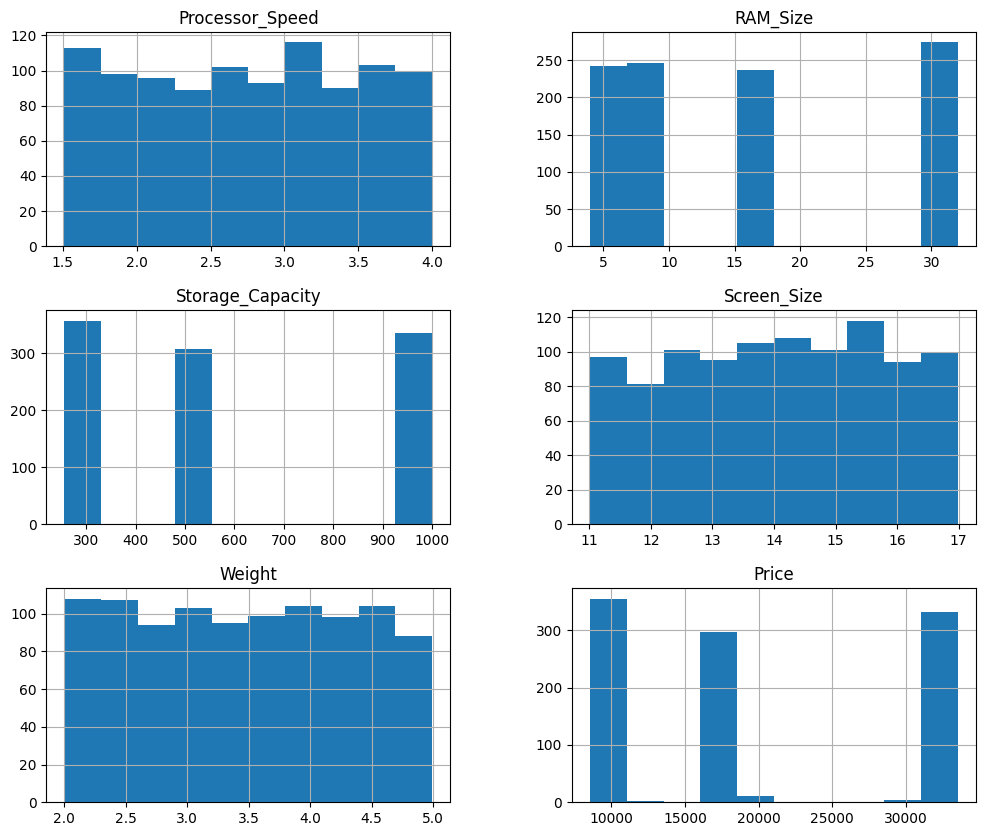

In [ ]:
laptop_data.hist(figsize=(12,10))

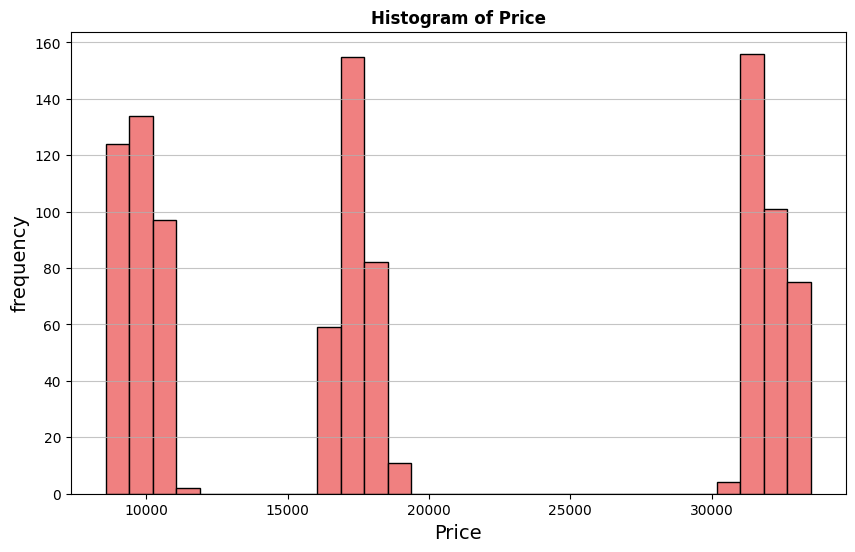

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(laptop_data['Price'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Histogram of Price', fontweight='bold')
plt.xlabel('Price',fontsize=14)
plt.ylabel('frequency',fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()

# 4. Data exploration at basic level

This step is needed to gauge the overall data, the volume of data, the types of columns present in the data. This initial assessment of the data is needed to identify which columns are Quantitative, Categorical or Qualitative, and identify and remove unwanted columns.

In here, we can see that all data are numeric, so I will keep all of them to do further analysis

# 5. Visual Exploratory Data Analysis (EDA) of data (with histogram and barcharts)

This requires visualising distribution of all the categorical predictor variables in the data using bar plots, and continuous predictor variables using histograms.

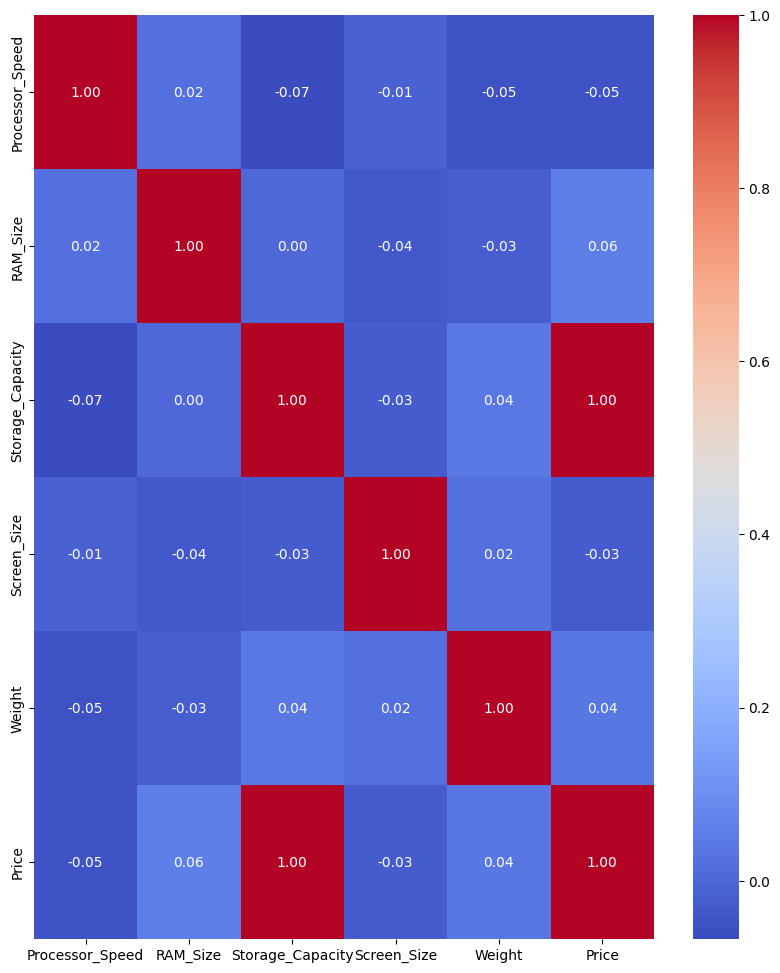

In [ ]:
# ## create a temporary variable to store laptop_price_df without string value in brand name collums, because heatmap will not be able to draw with string value


laptop_temporary = laptop_data.drop(columns=['Brand'])

# Plot the heatmap for the correlation of numeric columns
plt.figure(figsize=(10, 12))
sns.heatmap(laptop_temporary.corr(), annot=True,  cmap='coolwarm',fmt='.2f')

# Show the heatmap
plt.show()

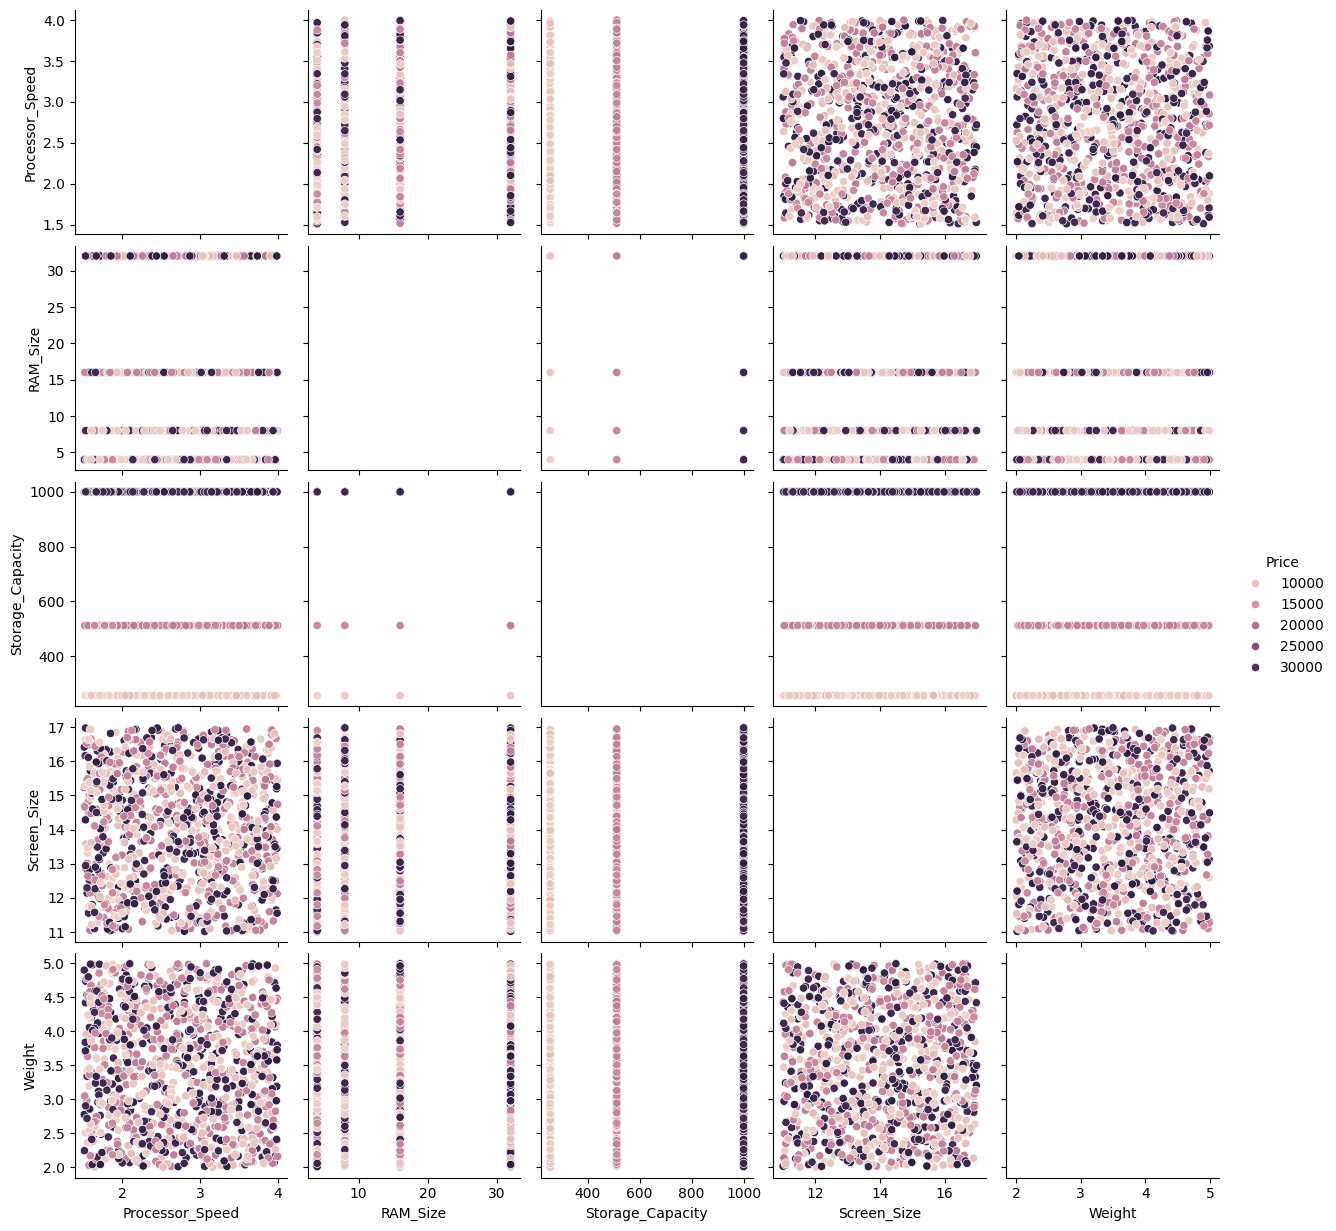

In [ ]:
# Adjusting the code for the variables from your dataset
sns.pairplot(laptop_data, hue='Price', vars=['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight'])

# Show the plots
plt.show()

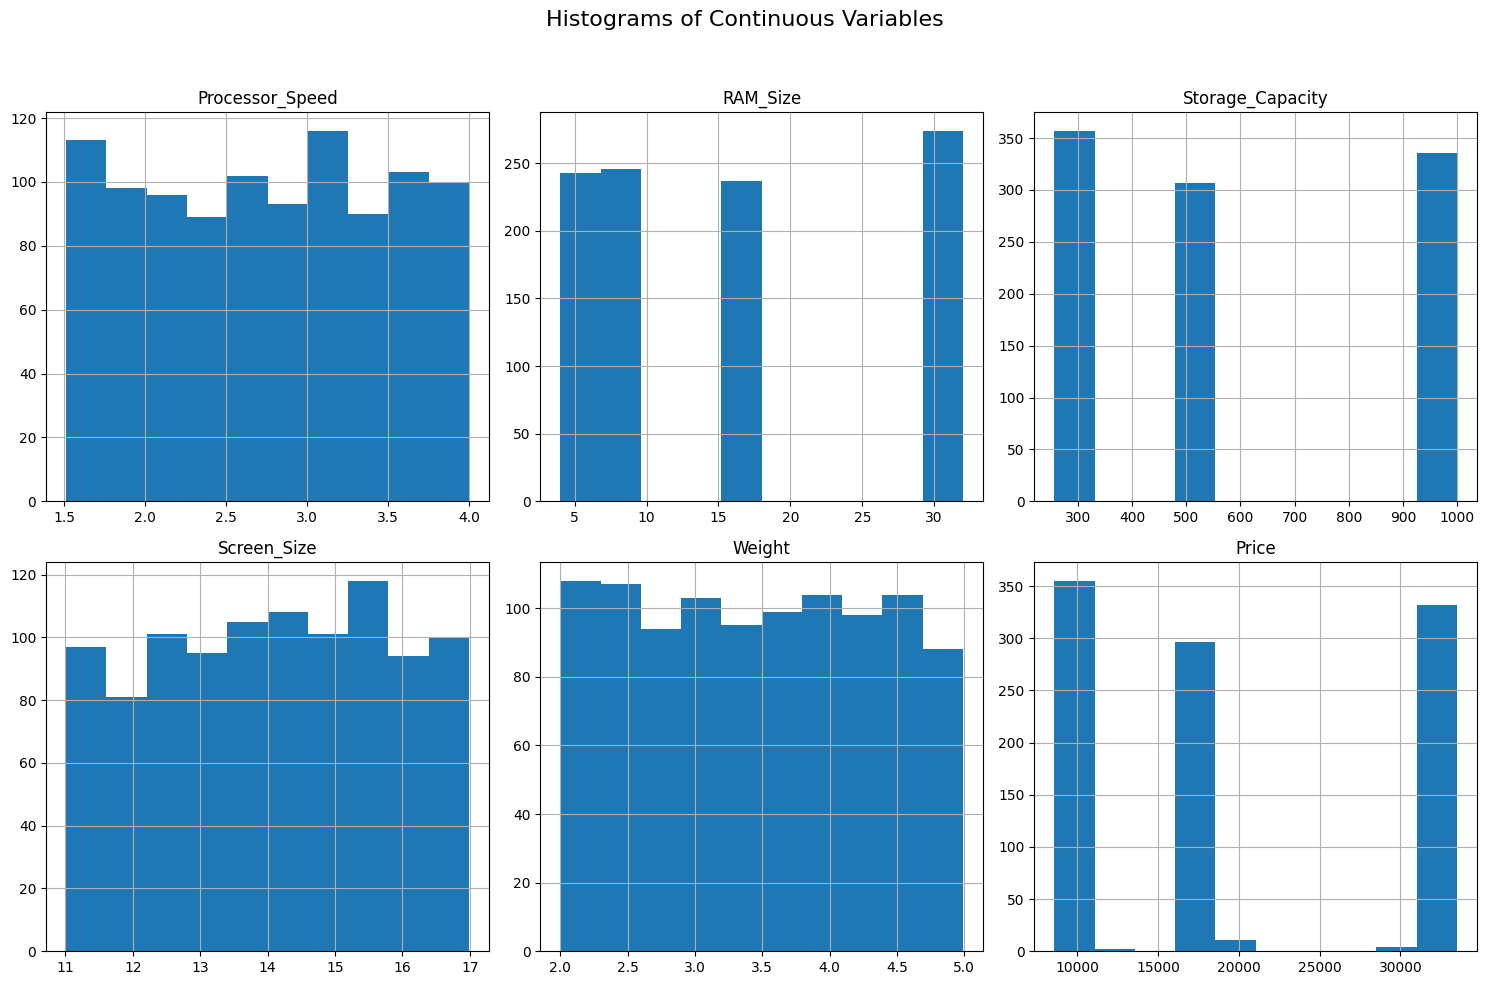

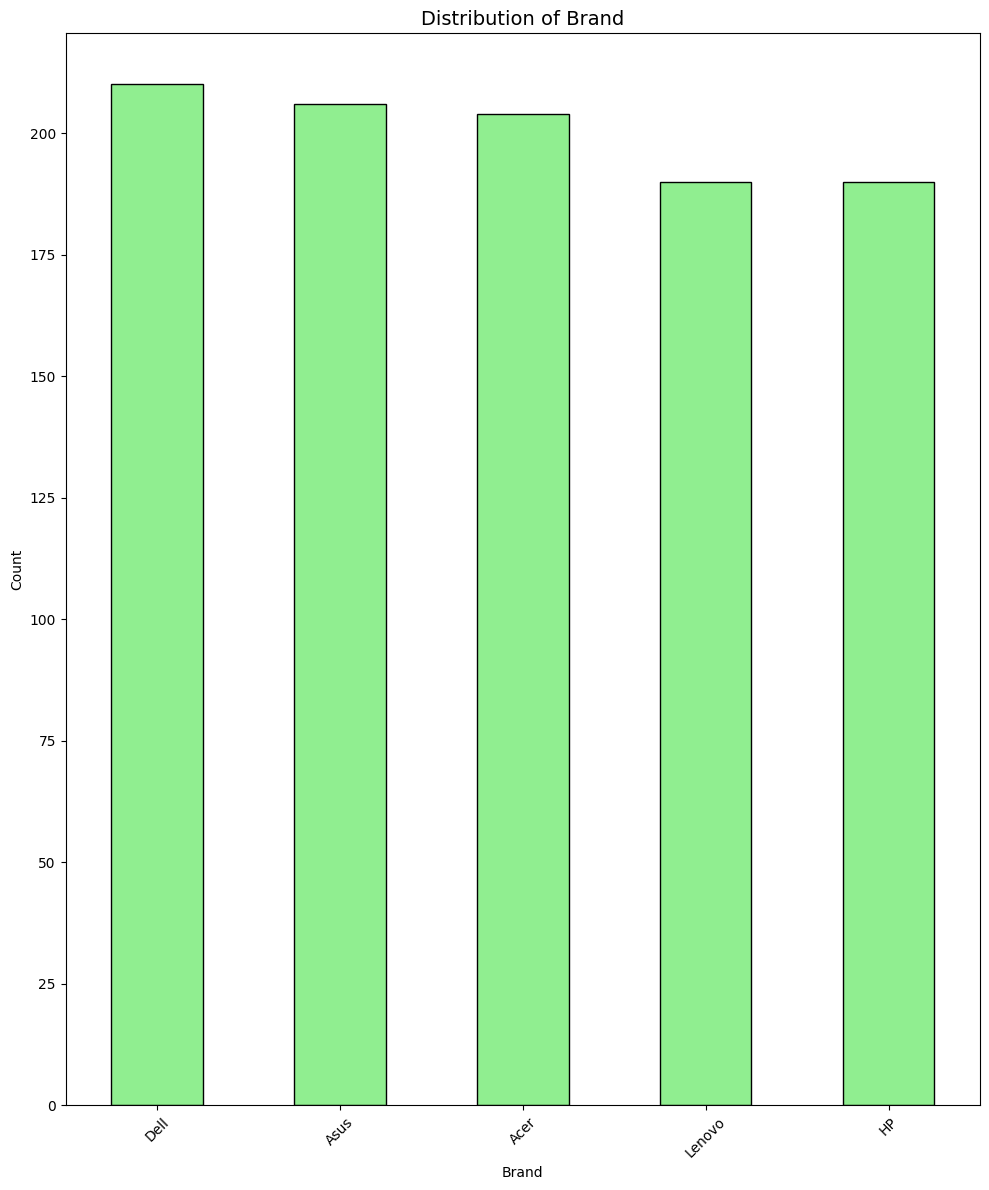

In [ ]:
categorical_columns = ['Brand']
continuous_columns = ['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']

# Create subplots for continuous variables (histograms)
laptop_data[continuous_columns].hist(figsize=(15, 10), layout=(2, 3))

# Display the histograms
plt.suptitle('Histograms of Continuous Variables', fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# Create bar plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(10, 12))
    laptop_data[col].value_counts().plot(kind='bar',color='lightgreen',edgecolor='black')
    plt.title(f'Distribution of {col}',fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='Brand', ylabel='Price'>

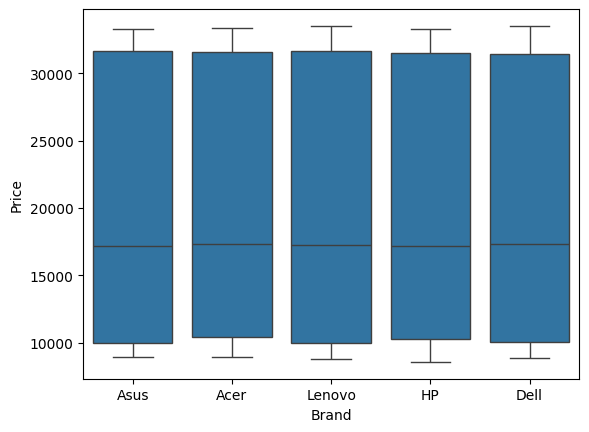

In [ ]:
sns.boxplot(data=laptop_data, x='Brand', y='Price')
## Boxplot

<Axes: xlabel='Brand', ylabel='Price'>

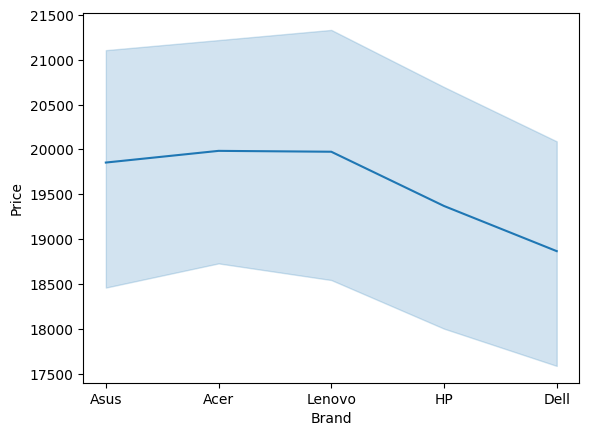

In [ ]:
sns.lineplot(data=laptop_data, x='Brand', y='Price')


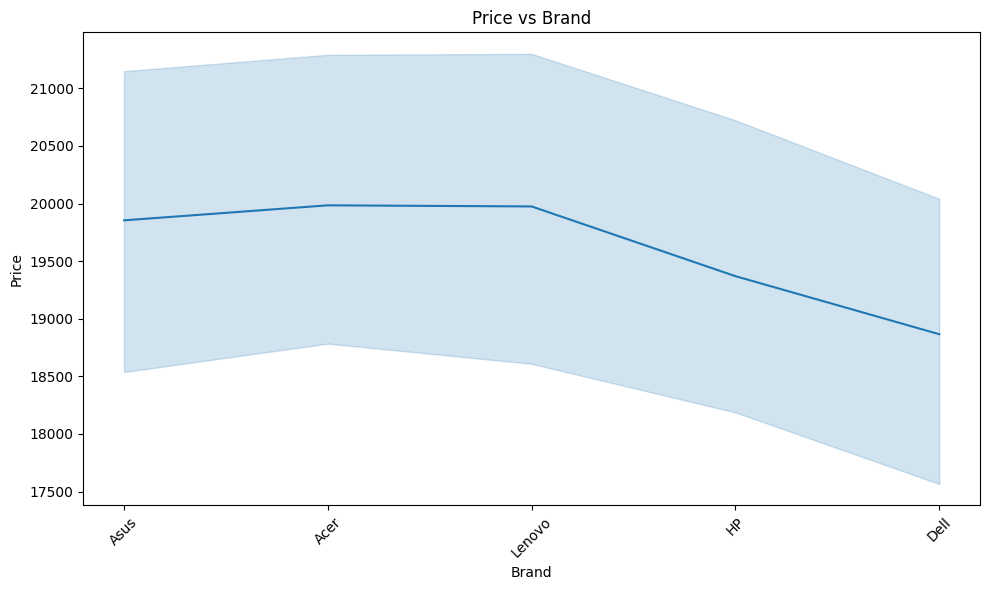

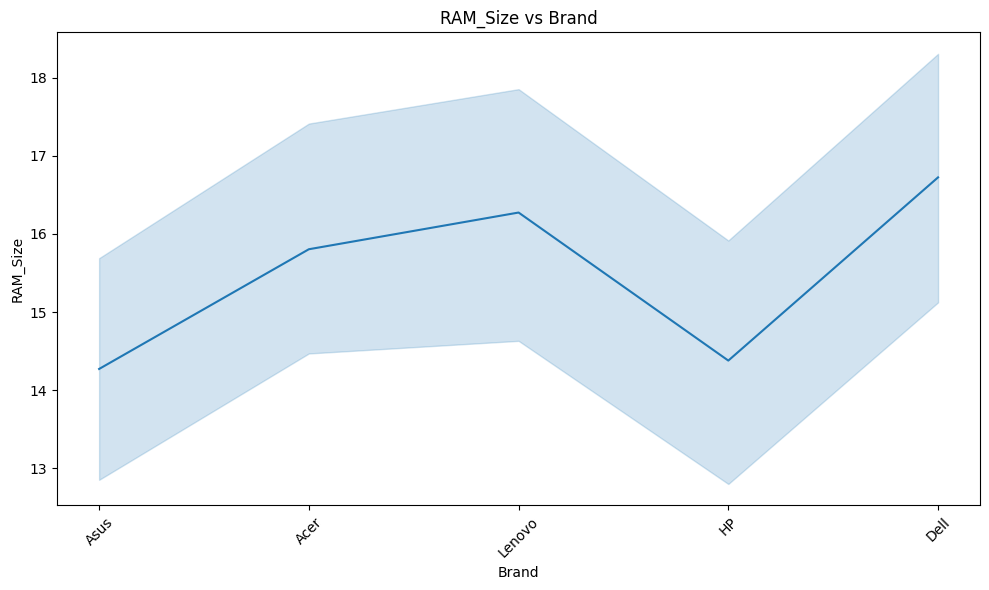

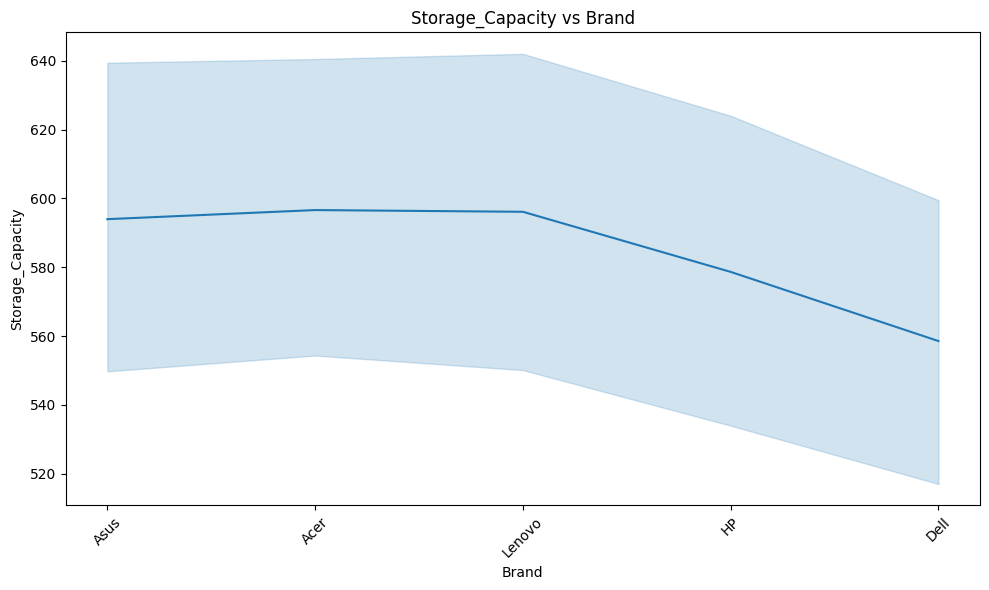

In [ ]:
# Identify categorical and numeric columns
categorical_columns = ['Brand']  # Modify this to include all your categorical columns
numeric_columns = ['Price', 'RAM_Size', 'Storage_Capacity']  # Modify this to include all your numeric columns

# Loop through each categorical column and each numeric column to create line plots
for cat_col in categorical_columns:

    for num_col in numeric_columns:

        plt.figure(figsize=(10, 6))


        sns.lineplot(data=laptop_data, x=cat_col, y=num_col)
        plt.title(f'{num_col} vs {cat_col}')
        plt.xticks(rotation=45)  # Rotate x labels for better readability
        plt.tight_layout()
        plt.show()

# part 6 outlier analysis

In [ ]:
laptop_temporary_2= laptop_data.drop(columns=['Brand'])
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

find_outliers_IQR(laptop_temporary)

laptop_temporary_2.isnull().sum()

##There is no outlier

,0
Processor_Speed,0
RAM_Size,0
Storage_Capacity,0
Screen_Size,0
Weight,0
Price,0


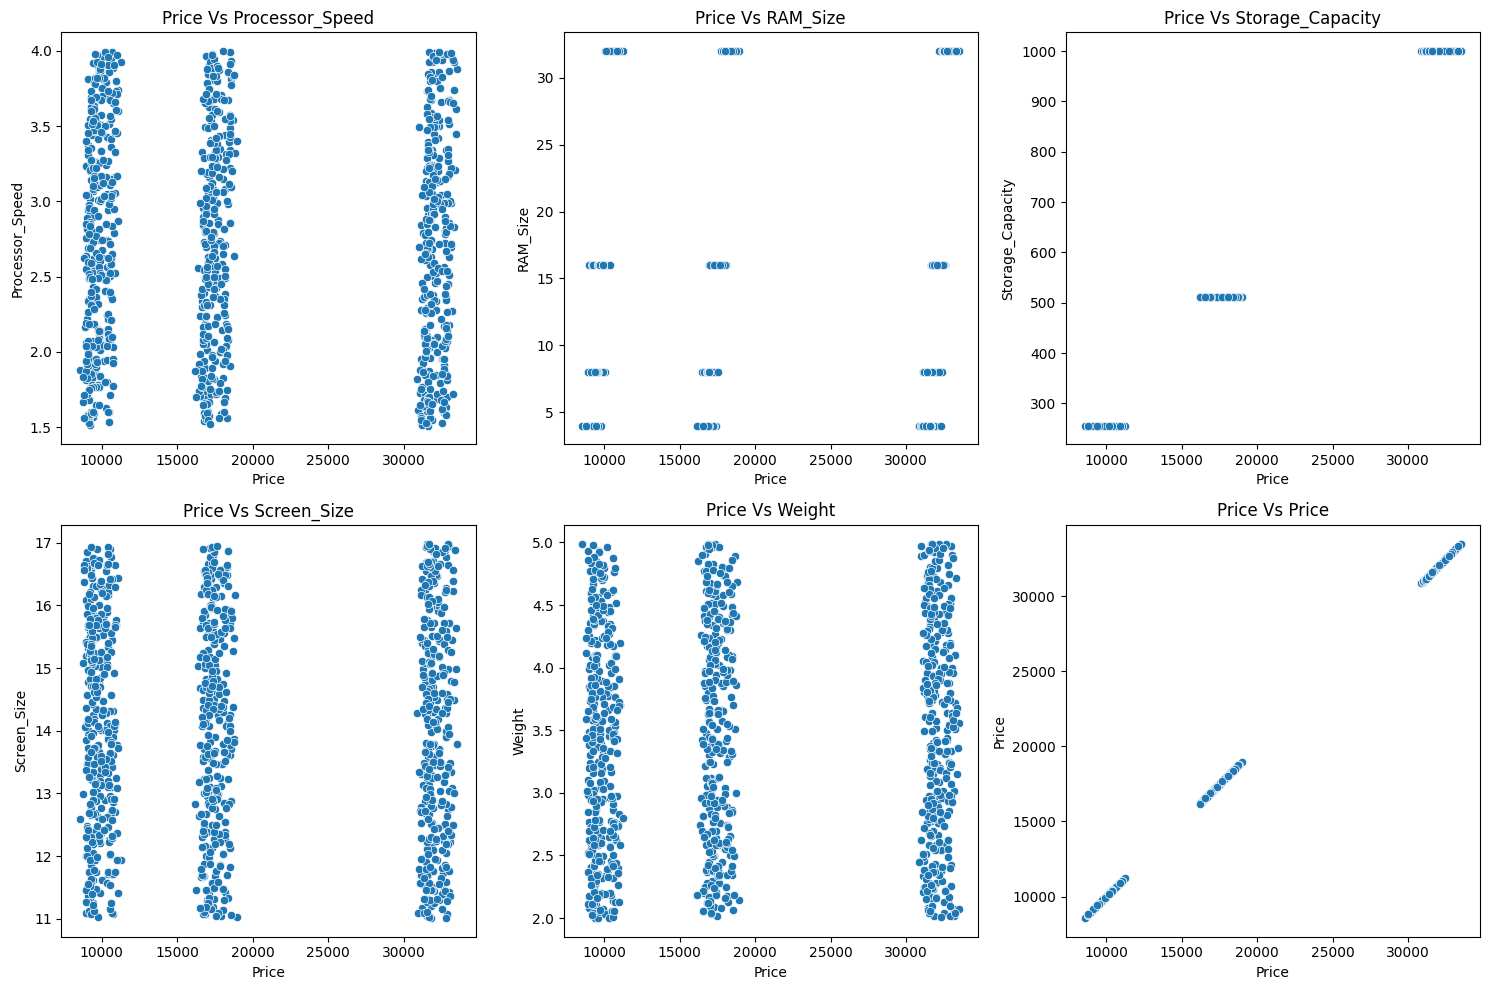

In [ ]:
num_cols = len(laptop_temporary_2.columns)

# Calculate the number of rows needed
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

# Create a figure and an array of subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Loop through each column in the DataFrame and create scatter plots
for i, x in enumerate(laptop_temporary_2.columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]

    sns.scatterplot(data=laptop_temporary_2, x='Price', y=x, ax=ax)
    ax.set_title(f'Price Vs {x}')

# Remove any unused subplots
for i in range(num_cols, num_rows*3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col] if num_rows > 1 else axes[col])

plt.tight_layout()
plt.show()

Only piece of data with any correlation is Price and Storage Capacity. Everything else is too sporadic.

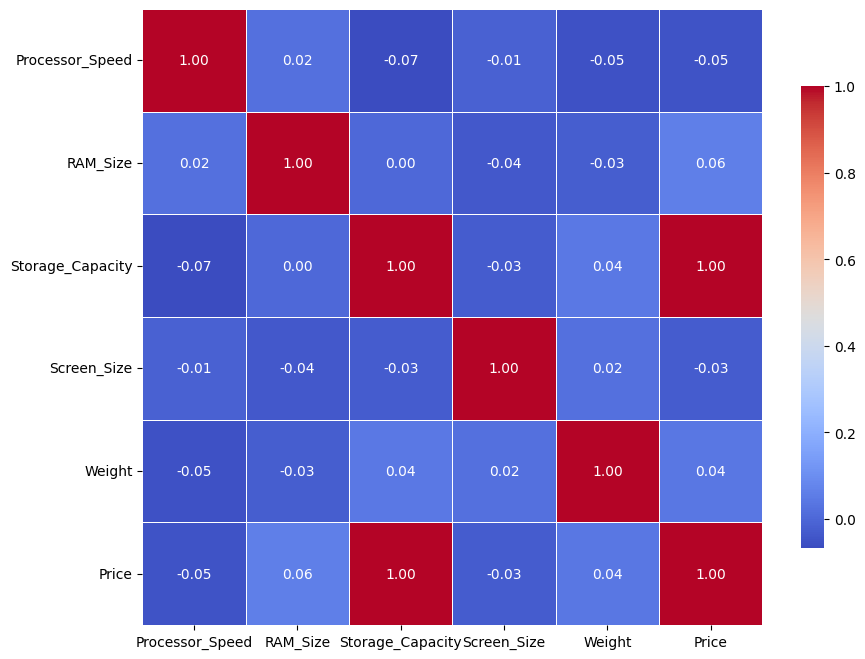

In [ ]:
# Calculate the correlation matrix
correlation_matrix = laptop_temporary_2.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5,cbar_kws={"shrink": 0.75},fmt='.2f')

# Show the plot
plt.show()

Storage capacity and price are the only variables with a resemblance of correlation to the price.

In [ ]:
# Extracting the correlation values for Price with the other features
price_correlation = correlation_matrix['Price'].sort_values(ascending=False)

# Display the correlation values
price_correlation

## Storage_capacity is the strongest corelation

# There is no corelation:
# RAM_Size            0.061237
# Weight              0.038417
# Screen_Size        -0.026740
# Processor_Speed    -0.050737






,Price
Price,1.000000
Storage_Capacity,0.997908
RAM_Size,0.061237
Weight,0.038417
Screen_Size,-0.026740
Processor_Speed,-0.050737


Storage capacity is the only variable with a high correlation. Everything else has no correlation to price.

In [ ]:
price_corr = dict(laptop_temporary_2.corr()['Price'])
strong_corr_attrs = dict(filter(lambda x: x[1] >= 0.7 and x[0] != 'Price', price_corr.items()))
strong_corr_attrs.keys()

dict_keys(['Storage_Capacity'])

In [ ]:
price_corr = dict(laptop_temporary_2.corr()['Price'])
weak_corr_attrs = dict(filter(lambda x: x[1] < 0.3 and x[0] != 'Price', price_corr.items()))
weak_corr_attrs.keys()

dict_keys(['Processor_Speed', 'RAM_Size', 'Screen_Size', 'Weight'])

In [ ]:
price_corr = dict(laptop_temporary_2.corr()['Price'])
moderate_corr_attrs = dict(filter(lambda x: x[1] >= 0.7 and x[1] < 0.3 and x[0] != 'Price', price_corr.items()))
moderate_corr_attrs.keys()

dict_keys([])

Step 9: Statistical Feature Selection - ANOVA Test

In [ ]:
# Perform ANOVA to check if there's a significant difference in Price between different Brands
anova_result = stats.f_oneway(
    *[laptop_data[laptop_data['RAM_Size'] == brand]['Price'] for brand in laptop_data['RAM_Size'].unique()]
)

# Display the result
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

# Check if p-value is significant
if anova_result.pvalue < 0.05:
    print("Reject H0: There is a significant difference in Price between different Brands.")
else:
    print("Fail to reject H0: No significant difference in Price between different Brands.")

F-statistic: 2.1261838979592724
p-value: 0.09529165428748863
Fail to reject H0: No significant difference in Price between different Brands.


In [ ]:
# Load the dataset (assuming it's already loaded into laptop_price_df)

# Convert the 'Brand' column (nominal) to numeric using get_dummies()
laptop_temporary_3 = pd.get_dummies(laptop_data, columns=['Brand'], drop_first=True)

# Display the first few rows of the converted dataset
print(laptop_temporary_3.head())

   Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0         3.830296        16               512    11.185147  2.641094   
1         2.912833         4              1000    11.311372  3.260012   
2         3.241627         4               256    11.853023  2.029061   
3         3.806248        16               512    12.280360  4.573865   
4         3.268097        32              1000    14.990877  4.193472   

          Price  Brand_Asus  Brand_Dell  Brand_HP  Brand_Lenovo  
0  17395.093065        True       False     False         False  
1  31607.605919       False       False     False         False  
2   9291.023542       False       False     False          True  
3  17436.728334       False       False     False         False  
4  32917.990718       False       False     False         False  


In [ ]:

# price is the target variable (set as y) and the rest as features as X.
X = laptop_temporary_3.drop(columns=['Price'])
y = laptop_temporary_3['Price']  # Target variable

# splitting data into training and testing sets at an 80:20 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# show the results
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 9)
X_test shape: (200, 9)
y_train shape: (800,)
y_test shape: (200,)


data has been split between training and testing at an 80:20 ratio.

**Step 10**

In [ ]:
# Selecting the final features for building the machine learning/AI model
SelectedColumns = ['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']

# Reading the dataset
laptop_data = pd.read_csv('/content/Laptop_price.csv')

# Selecting these features from the dataset
DataForML = laptop_data[SelectedColumns]
DataForML.head()


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


**Step 11**


In [ ]:
# Converting categorical variables to numeric format
DataForML_Numeric = pd.get_dummies(DataForML)

# Adding the target variable 'Price' back into the dataset
DataForML_Numeric['Price'] = DataForML['Price']

# Displaying sample rows from the dataset
DataForML_Numeric.head()


,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,11.185147,2.641094,17395.093065,False,True,False,False,False
1,2.912833,4,1000,11.311372,3.260012,31607.605919,True,False,False,False,False
2,3.241627,4,256,11.853023,2.029061,9291.023542,False,False,False,False,True
3,3.806248,16,512,12.280360,4.573865,17436.728334,True,False,False,False,False
4,3.268097,32,1000,14.990877,4.193472,32917.990718,True,False,False,False,False


**Step 12**

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

#Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Storage_Capacity']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)



**Step 13: Testing Models**

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.990219625942915

##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity         Price  PredictedPrice
0              1000  31558.996664         31160.0
1              1000  32885.834784         31160.0
2               512  17420.461668         17494.0
3               512  17694.482038         17494.0
4               512  17545.414501         17494.0
Mean Accuracy on test data: 94.40508009048446
Median Accuracy on test data: 96.45398282334526

Accuracy values for 10-fold Cross Validation:
 [95.52353458 95.76131062 95.9947477  96.18639165 95.30931446 95.0773763
 94.80132598 96.4146807  94.69111842 95.21589021]

Final Average Accuracy of the model: 95.5


Testing accuracy for SVM model is 95.5, lower than others.

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9959518668447789


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:51:53] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity         Price  PredictedPrice
0              1000  31558.996664         32060.0
1              1000  32885.834784         32060.0
2               512  17420.461668         17415.0
3               512  17694.482038         17415.0
4               512  17545.414501         17415.0
Mean Accuracy on test data: 96.46135377763531
Median Accuracy on test data: 97.30476783861315


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:51:53] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:51:54] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:51:55] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



Accuracy values for 10-fold Cross Validation:
 [96.66087511 96.65003732 96.81957167 97.05963202 96.73157666 96.43775309
 96.55417033 97.14818709 96.49353981 96.17736908]

Final Average Accuracy of the model: 96.67


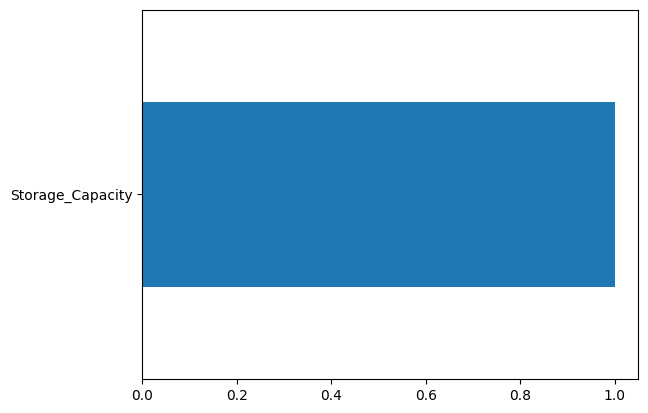

In [ ]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Accuracy of 96.67, very good result.

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9959518503698115

##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity         Price  PredictedPrice
0              1000  31558.996664         32058.0
1              1000  32885.834784         32058.0
2               512  17420.461668         17415.0
3               512  17694.482038         17415.0
4               512  17545.414501         17415.0
Mean Accuracy on test data: 96.46091004925135
Median Accuracy on test data: 97.31294174937243

Accuracy values for 10-fold Cross Validation:
 [96.66132319 96.65057899 96.81741582 97.06161468 96.72886858 96.43793691
 96.5532789  97.14895815 96.49680194 96.17766194]

Final Average Accuracy of the model: 96.67


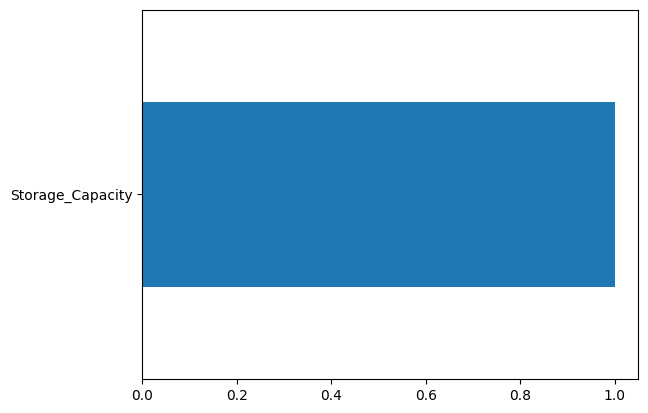

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Accuracy of 96.67, very good result. On par with XG Boost.

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9959518668454509

##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity         Price  PredictedPrice
0              1000  31558.996664         32060.0
1              1000  32885.834784         32060.0
2               512  17420.461668         17415.0
3               512  17694.482038         17415.0
4               512  17545.414501         17415.0
Mean Accuracy on test data: 96.46135377763531
Median Accuracy on test data: 97.30476783861315

Accuracy values for 10-fold Cross Validation:
 [96.66087783 96.65003649 96.81957283 97.05963134 96.73157957 96.43775639
 96.55417752 97.14819256 96.49355055 96.17737384]

Final Average Accuracy of the model: 96.67


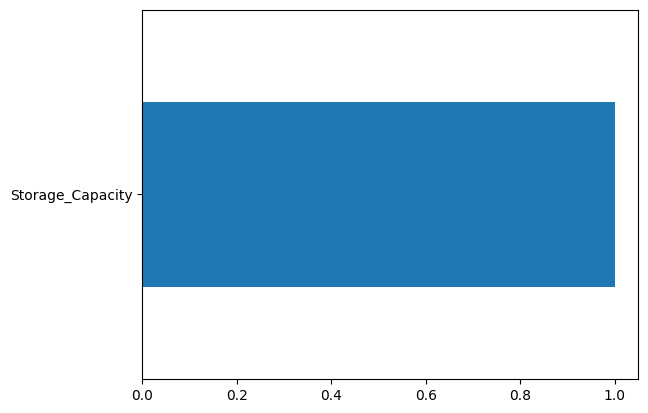

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Accuracy of 96.67, very good result. On par with XG Boost, and Random Tree Regressor.

In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Standardising data for K-Nearest Neighbour Model.

In [ ]:
# checking the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 1)
(700,)
(300, 1)
(300,)


In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.9947310222598399

##### Model Validation and Accuracy Calculations ##########
   Storage_Capacity         Price  PredictedPrice
0               0.0  10900.502075          9359.0
1               1.0  31727.516697         31819.0
2               0.0   9636.022750          9359.0
3               0.0   9412.599857          9359.0
4               1.0  31641.105861         31819.0
Mean Accuracy on test data: 96.30053465666428
Median Accuracy on test data: 97.3809851947048

Accuracy values for 10-fold Cross Validation:
 [95.85204009 96.34820414 96.90673314 97.19224989 96.6534977  96.37063532
 96.75825275 96.57126723 96.81572838 96.35675523]

Final Average Accuracy of the model: 96.58


Average accuracy of model is close to XG Boost and Random Tree Regressor, but is a bit worse. Still better than SVM.

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['Storage_Capacity']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:26:13] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:26:15] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:26:17] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:26:18] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:


Accuracy values for 10-fold Cross Validation:
 [96.66087511 96.65003732 96.81957167 97.05963202 96.73157666 96.43775309
 96.55417033 97.14818709 96.49353981 96.17736908]

Final Average Accuracy of the model: 96.67


Accuracy of 96.67, very good result. On par with XG Boost, and Random Tree Regressor. Better than K-Nearest Neighbour and SVM.

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:26:29] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [ ]:
import pickle
import os

# Saving final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


In [ ]:
from re import IGNORECASE

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Storage_Capacity']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Generating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

In [ ]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[1000],columns=['Storage_Capacity'])

print(NewSampleData)
InputData = NewSampleData

# Calling the Function for prediction
#FunctionPredictResult(InputData=NewSampleData)

   Storage_Capacity
0              1000
